<a href="https://colab.research.google.com/github/SyedSameena18/Big-Mart-Sales/blob/ml-model-training/Big_Mart_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing



In [ ]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv('/content/test1.csv')

In [ ]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1,5493
1,DRA12,11.60,LF,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1,5059
2,DRA24,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1,4650
3,DRB01,NaN,low fat,0.143991,Soft Drinks,191.5530,OUT019,1985,Small,Tier 1,Grocery Store,4376
4,DRB01,7.39,Low Fat,0.082239,Soft Drinks,187.7530,OUT046,1997,Small,Tier 1,Supermarket Type1,5233


In [ ]:
# number of data points & number of features
big_mart_data.shape

(5681, 12)

In [ ]:
# getting some information about thye dataset
big_mart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Item_Outlet_Sales          5681 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 532.7+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()


,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


Handling Missing Values

Mean --> average

Mode --> more repeated value

In [ ]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

np.float64(12.695633368756642)

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

/tmp/ipython-input-2509980927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)


In [ ]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [ ]:
print(miss_values)

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Outlet_Size, Length: 5681, dtype: bool


In [ ]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [ ]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903,2953.582644
std,4.245189,0.051252,61.809091,8.372256,1522.366155
min,4.555000,0.000000,31.990000,1985.000000,900.000000
25%,9.195000,0.027047,94.412000,1987.000000,1613.000000
50%,12.695633,0.054154,141.415400,1999.000000,2642.000000
75%,15.850000,0.093463,186.026600,2004.000000,4241.000000
max,21.350000,0.323637,266.588400,2009.000000,5998.000000


Numerical Features

In [ ]:
sns.set()

/tmp/ipython-input-1330319193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


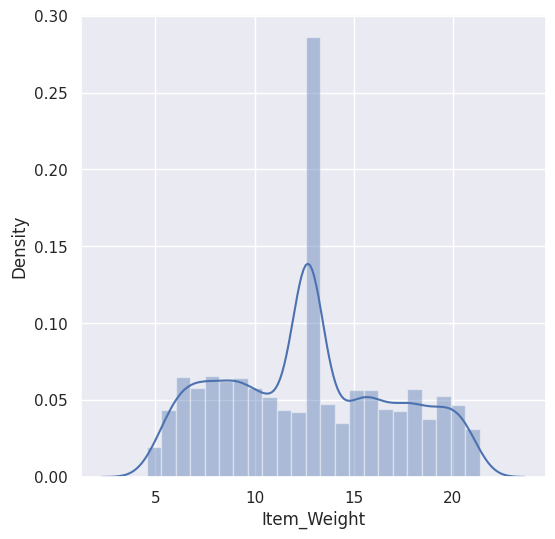

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

/tmp/ipython-input-193435663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


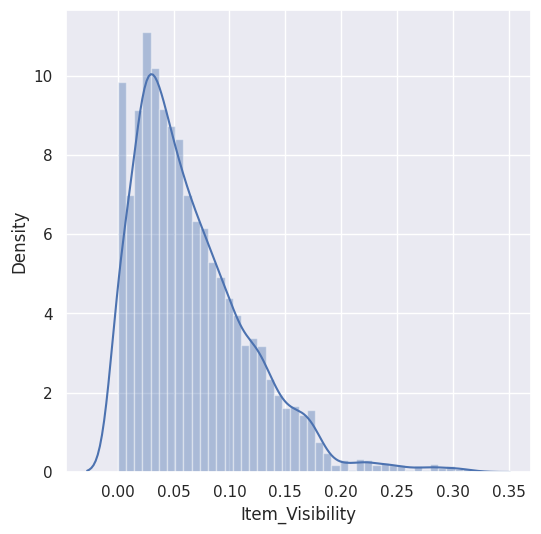

In [ ]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

/tmp/ipython-input-1610987680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


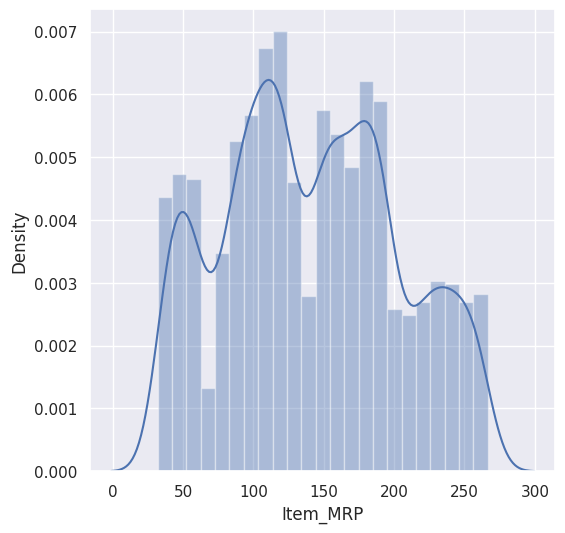

In [ ]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

/tmp/ipython-input-1323853436.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


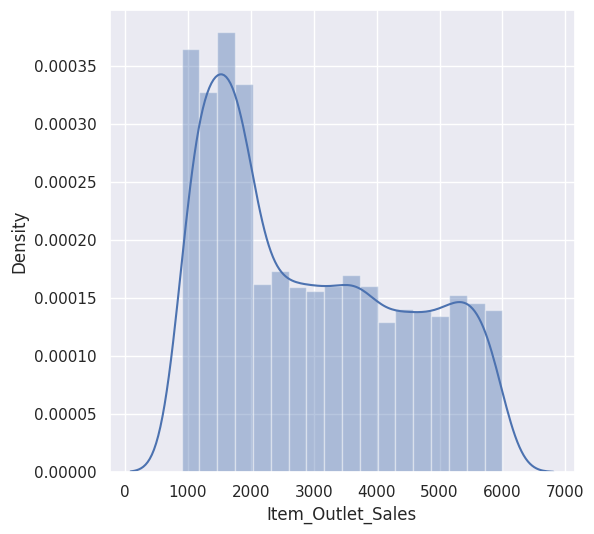

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

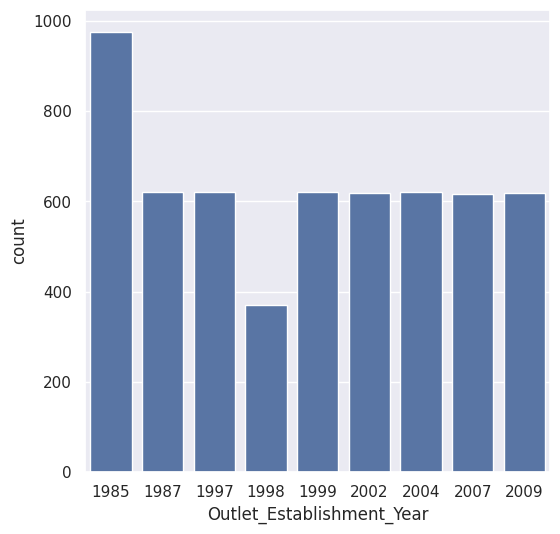

In [ ]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Categorical Features

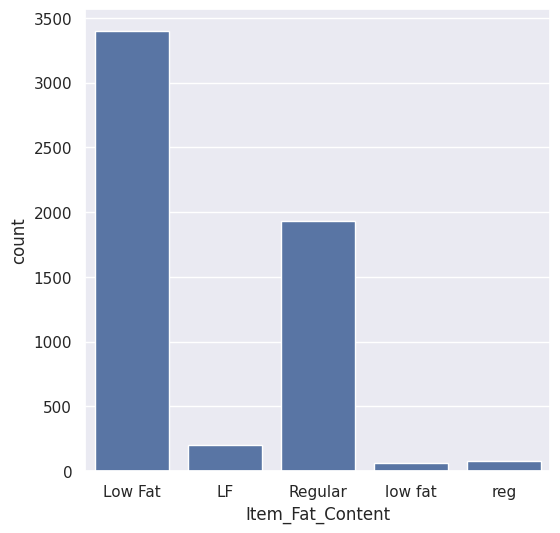

In [ ]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

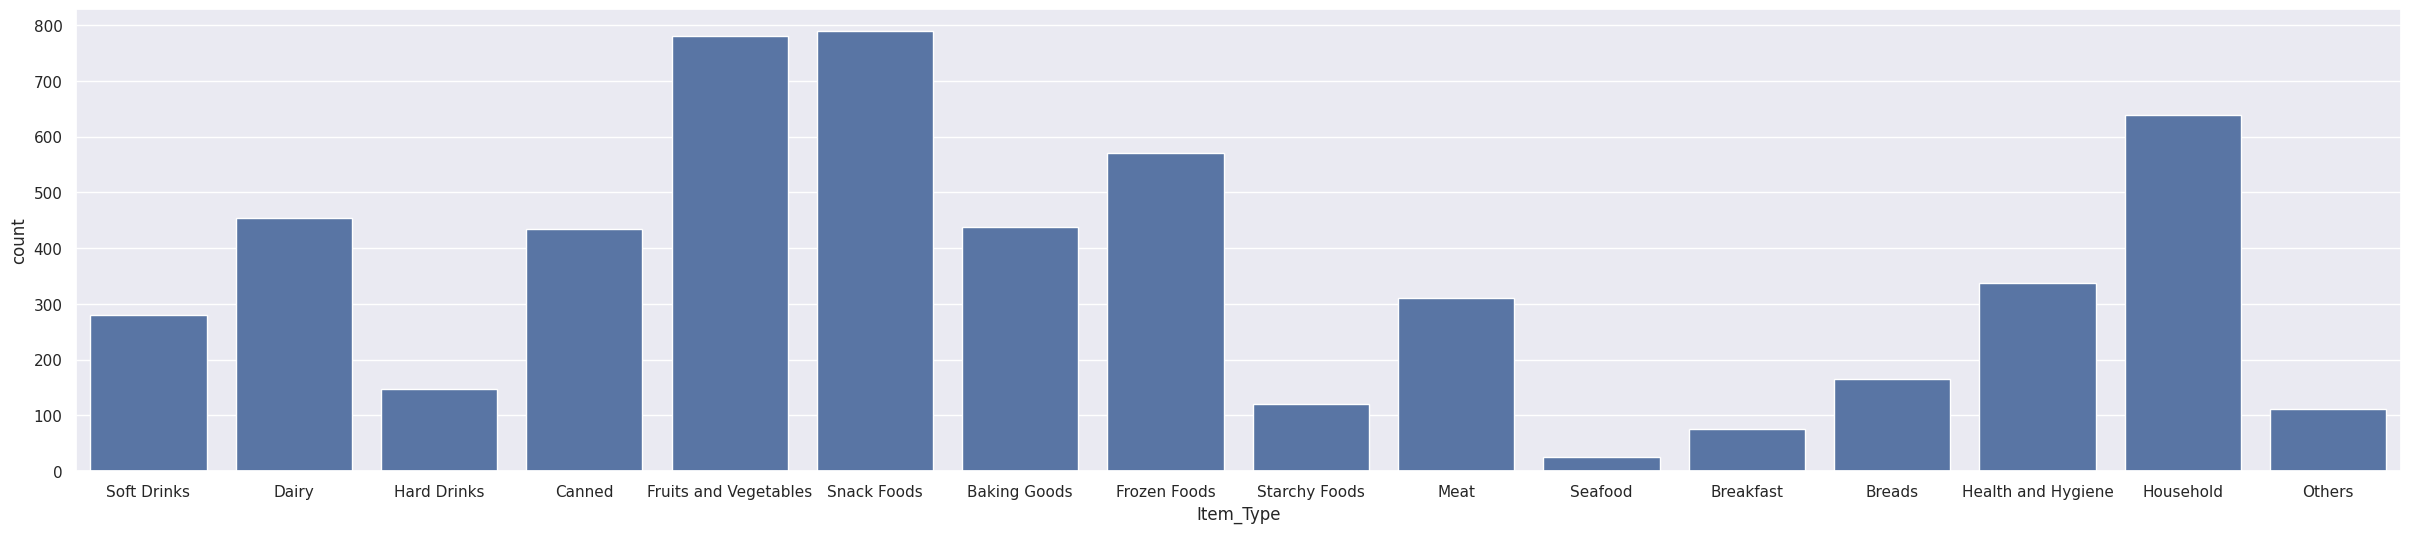

In [ ]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

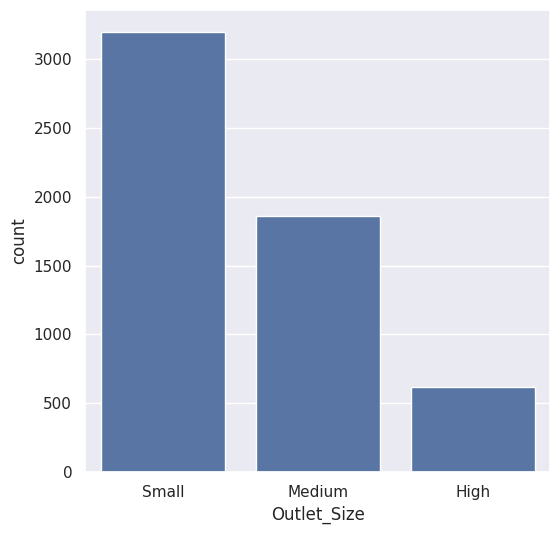

In [ ]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

Data Pre-Processing

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.600000,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1,5493
1,DRA12,11.600000,LF,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1,5059
2,DRA24,19.350000,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1,4650
3,DRB01,12.695633,low fat,0.143991,Soft Drinks,191.5530,OUT019,1985,Small,Tier 1,Grocery Store,4376
4,DRB01,7.390000,Low Fat,0.082239,Soft Drinks,187.7530,OUT046,1997,Small,Tier 1,Supermarket Type1,5233


In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,11.600000,0,0.040946,14,142.9154,8,1997,2,0,1,5493
1,0,11.600000,0,0.041010,14,141.0154,9,1999,1,0,1,5059
2,1,19.350000,1,0.039928,14,164.5868,8,1997,2,0,1,4650
3,3,12.695633,0,0.143991,14,191.5530,4,1985,2,0,0,4376
4,3,7.390000,0,0.082239,14,187.7530,8,1997,2,0,1,5233


/tmp/ipython-input-2000484156.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


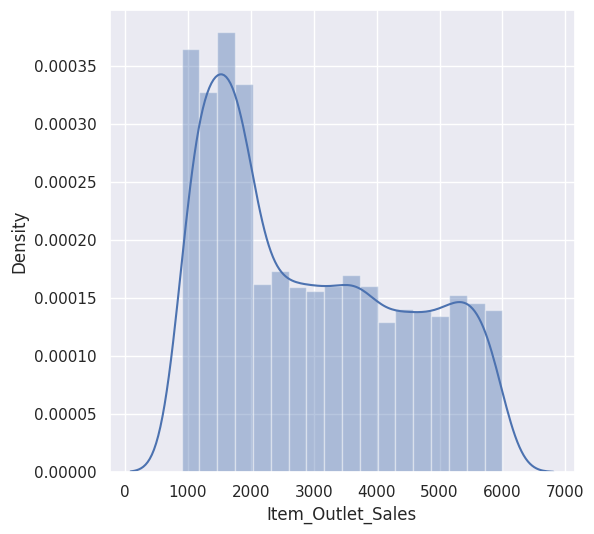

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()



Splitting features and Target

In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                   0    11.600000                 0         0.040946   
1                   0    11.600000                 0         0.041010   
2                   1    19.350000                 1         0.039928   
3                   3    12.695633                 0         0.143991   
4                   3     7.390000                 0         0.082239   
...               ...          ...               ...              ...   
5676             1538     6.590000                 0         0.026292   
5677             1539    12.695633                 0         0.064109   
5678             1540    12.695633                 0         0.011233   
5679             1540    10.500000                 0         0.011334   
5680             1542    14.650000                 0         0.083290   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            14  142.9154                  8    

In [ ]:
print(Y)

0       5493
1       5059
2       4650
3       4376
4       5233
        ... 
5676    1031
5677     904
5678    1679
5679    1659
5680    1934
Name: Item_Outlet_Sales, Length: 5681, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5681, 11) (4544, 11) (1137, 11)


Machine Learning Model Training

XGBoost Regressor

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)